The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found 1659 files
First file: /Users/alforest/Desktop/Documents/SomeSeeds/F7_free/F7_ramp.001


Reading COMs:   0%|                                    | 0/1659 [00:00<?, ?it/s]/Users/alforest/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: HA
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/alforest/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/TXYZParser.py:139: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
Reading COMs: 100%|█████████████████████████| 1659/1659 [08:13<00:00,  3.36it/s]


COM trajectory shape: (1659, 600, 3)


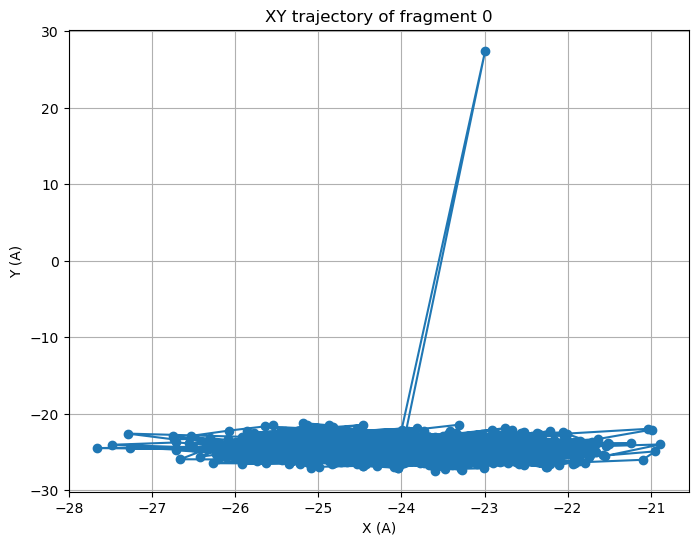

In [15]:
%load_ext autoreload
%autoreload 2

import ar5
from ar5.file_utils import find_xyz_files
from ar5.analysis import traj_com
import numpy as np

data_dir = "/Users/alforest/Desktop/Documents/SomeSeeds/F7_free/"
prefix = "F7_ramp"

filepaths = find_xyz_files(data_dir, prefix=prefix, type="numbered")

print(f"Found {len(filepaths)} files")
if len(filepaths) > 0:
    print("First file:", filepaths[0])

com_traj = traj_com(filepaths)

print(f"COM trajectory shape: {com_traj.shape}")

import matplotlib.pyplot as plt

frag_idx = 0
xy = com_traj[:, frag_idx, :2]

plt.figure(figsize=(8,6))
plt.plot(xy[:,0], xy[:,1], marker='o')
plt.xlabel("X (A)")
plt.ylabel("Y (A)")
plt.title(f"XY trajectory of fragment {frag_idx}")
plt.grid(True)
plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using frame: /Users/alforest/Desktop/Documents/SomeSeeds/F7_free/F7_ramp.1377
Found 600 fragments
Average |psi6| = 0.779
0.7783156830716766


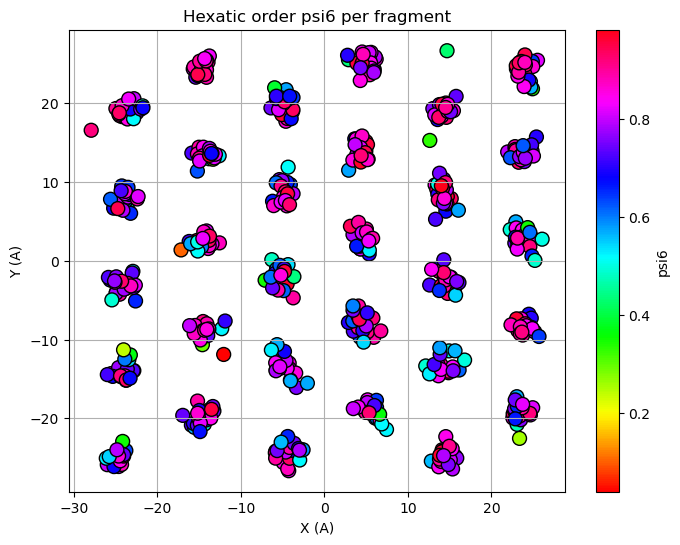

In [27]:

%load_ext autoreload
%autoreload 2


import ar5
from ar5.file_utils import find_xyz_files
from ar5.analysis import traj_com, compute_fragment_directors, get_fragment_neighbors, compute_hexatic_order_parameter

import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt


data_dir = "/Users/alforest/Desktop/Documents/SomeSeeds/F7_free/"
prefix = "F7_ramp"

filepaths = find_xyz_files(data_dir, prefix=prefix, type="numbered")

frame_path = filepaths[514]
print(f"Using frame: {frame_path}")

u = mda.Universe(frame_path, format="TXYZ")

coms = np.array([frag.center_of_mass() for frag in u.atoms.fragments])
directors = compute_fragment_directors(u)
box = u.dimensions[:3]

print(f"Found {len(coms)} fragments")

psi6_array = []
mag_array = []
angle_array = []

for i in range(len(coms)):
    neighbors, Rij_unit = get_fragment_neighbors(coms, directors, box, i)
    psi6, mag_psi6, angle_psi6 = compute_hexatic_order_parameter(Rij_unit)

    psi6_array.append(psi6)
    mag_array.append(mag_psi6)
    angle_array.append(angle_psi6)

psi6_array = np.array(psi6_array)
mag_array = np.array(mag_array)
angle_array = np.array(angle_array)

print(f"Average |psi6| = {mag_array.mean():.3f}")

neighbors, Rij_unit = get_fragment_neighbors(coms, directors, box, 50)
psi6, mag_psi6, angle_psi6 = compute_hexatic_order_parameter(Rij_unit)

print(mag_psi6)

xy_coms = coms[:, :2]

plt.figure(figsize=(8,6))
sc = plt.scatter(xy_coms[:,0], xy_coms[:,1], c=mag_array, cmap='hsv', s=100, edgecolor='black')
plt.colorbar(sc, label="psi6")
plt.xlabel("X (A)")
plt.ylabel("Y (A)")
plt.title("Hexatic order psi6 per fragment")
plt.grid(True)
plt.show()
